In [15]:
#Import Packages
import numpy as np
import pandas as pd
from scipy import stats
import math

In [16]:
#Create a List
arr=[12,4,5,78,9,8,9,5,3]
print('arr',arr)

arr [12, 4, 5, 78, 9, 8, 9, 5, 3]


In [17]:
#Mean
print('mean of array',np.mean(arr))

mean of array 14.777777777777779


In [18]:
#Median
print('median of array',np.median(arr))

median of array 8.0


In [19]:
#Mode
print('mode',stats.mode(arr))

mode ModeResult(mode=array([5]), count=array([2]))


In [20]:
#Variance
print('variance',np.var(arr))

variance 507.0617283950617


In [21]:
#Standard deviation
print('standard deviation',np.std(arr))

standard deviation 22.518031183810493


In [22]:
#Range
range=max(arr)-min(arr)
range

75

In [23]:
np.random.seed(7)

population_ages1=stats.poisson.rvs(loc=10,mu=19,size=2500000)#rvs=random variates
population_ages2=stats.poisson.rvs(loc=11,mu=17,size=2000000)#mu=mean:loc=reference point
population_ages=np.concatenate((population_ages1,population_ages2))

bangalore_ages1=stats.poisson.rvs(loc=9,mu=7,size=12)
bangalore_ages2=stats.poisson.rvs(loc=8,mu=5,size=11)
bangalore_ages=np.concatenate((bangalore_ages1,bangalore_ages2))
print(population_ages.mean())
print(bangalore_ages.mean())

                               


28.559276222222223
14.869565217391305


In [24]:
#Two sample T-test
a=[12,8,9,6,8,5,4,23]
b=[5,7,6,7,8,4,2,7,0,2,1,8]
c=stats.ttest_ind(a,b)
c


Ttest_indResult(statistic=2.3107455424776164, pvalue=0.03290413677807511)

In [25]:
d=[78,4,8,5,6,9,8,1,4,6,7,6]
c=stats.ttest_ind(a,b)
c

Ttest_indResult(statistic=2.3107455424776164, pvalue=0.03290413677807511)

In [27]:
datafile="C:/Users/aksha/Desktop/ai/datasets/small_data.csv"
data=pd.read_csv(datafile)

In [28]:
data.head()

,date,location,month,price
0,25,NASHEVILLE,Apr,15.0
1,25,NASHEVILLE,Apr,45.0
2,25,NASHEVILLE,Apr,50.0
3,25,NASHEVILLE,Apr,120.0
4,25,NASHEVILLE,Apr,300.0


In [29]:
data.shape

(10, 4)

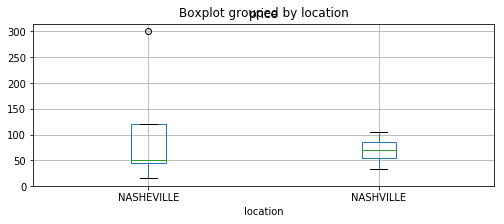

In [33]:
#Create a boxplot
data.boxplot("price",by='location',figsize=(8,3))

In [34]:
ctrl=data['price'][data.location=='NASHEVILLE']
grps=pd.unique(data.location.values)
d_data={grp:data['price'][data.location==grp] for grp in grps}

In [35]:
grps

array(['NASHEVILLE', 'NASHVILLE'], dtype=object)

In [36]:
d_data

{'NASHEVILLE': 0     15.0
 1     45.0
 2     50.0
 3    120.0
 4    300.0
 Name: price, dtype: float64, 'NASHVILLE': 5     34.0
 6     55.0
 7     70.0
 8    105.0
 9     85.0
 Name: price, dtype: float64}

In [37]:
d_data['NASHVILLE']

5     34.0
6     55.0
7     70.0
8    105.0
9     85.0
Name: price, dtype: float64

In [38]:
F,p=stats.f_oneway(d_data['NASHEVILLE'],d_data['NASHVILLE'])
print('F value is:',F)
print('P value is:',p)

F value is: 0.46850956725681436
P value is: 0.5130110056245326


# P SHOULD BE INCLUDED

# Two way ANOVA

In [39]:
import matplotlib.pyplot as plt
from statsmodels.graphics.factorplots import interaction_plot

In [40]:
datafi="C:/Users/aksha/Desktop/ai/datasets/test_train.csv"
data=pd.read_csv(datafi)

In [41]:
data.head()

,S.N,Country,Hours,Salary,House
0,0,France,34.0,12000.0,No
1,1,Spain,37.0,49000.0,Yes
2,2,Germany,20.0,34000.0,No
3,3,Spain,58.0,41000.0,No
4,4,Germany,40.0,43333.3,Yes


In [42]:
data.shape

(10, 5)

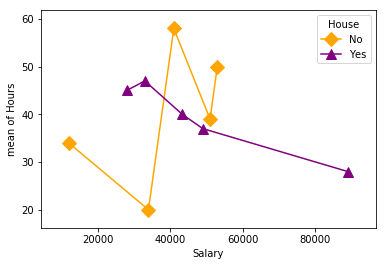

In [43]:
fig=interaction_plot(data.Salary,data.House,data.Hours,colors=['orange','purple'],markers=['D','^'],ms=10)

# Degree of Freedom

In [44]:
N=len(data.Hours)
df_a=len(data.House.unique()) - 1
df_b=len(data.Salary.unique()) - 1
df_axb=df_a*df_b
df_w=N-(len(data.House.unique())*len(data.Salary.unique()))

# Sum of Squares

In [47]:
grand_mean=data['Hours'].mean()
ssq_a=sum([(data[data.House==l].Hours.mean()-grand_mean)**2 for l in data.House])
ssq_b=sum([(data[data.Salary==l].Hours.mean()-grand_mean)**2 for l in data.Salary])
ssq_t=sum((data.Hours-grand_mean)**2)


In [48]:
vc=data[data.House=='VC']
oj=data[data.House=='OJ']
vc_Salary_means=[vc[vc.Salary==d].Hours.mean() for d in vc.Salary]
oj_Salary_means=[oj[oj.Salary==d].Hours.mean() for d in oj.Salary]


In [49]:
ssq_w=sum((oj.Hours-oj_Salary_means)**2)+sum((vc.Hours-vc_Salary_means)**2)
ssq_axb=ssq_t-ssq_a-ssq_b-ssq_w

# Mean of Square

In [50]:
ms_a=ssq_a/df_a
ms_b=ssq_b/df_b
ms_axb=ssq_axb/df_axb
ms_w=ssq_w/df_w
ssq_b

1087.6

# F ratio

In [51]:
f_a=ms_a/ms_w
f_b=ms_b/ms_w
f_axb=ms_axb/ms_w

ZeroDivisionError: float division by zero

# Obtaining P values

In [52]:
p_a=stats.f.sf(f_a,df_a,df_w)
p_b=stats.f.sf(f_b,df_b,df_w)
p_axb=stats.f.sf(f_axb,df_axb,df_w)

NameError: name 'f_a' is not defined

# Dataframe

In [53]:
results={'sum_sq':[ssq_a,ssq_b,ssq_axb,ssq_w],
        'df':[df_a,df_b,df_axb,df_w],
        'F':[f_a,f_b,f_axb,'NaN'],
        'PR(>F)':[p_a,p_b,p_axb,'NaN']}
columns=['sum_sq','df','F','PR(>F)']
aov_table1=pd.DataFrame(results,columns=columns,index=['House','Salary','House:Salary','Residual'])
aov_table1

NameError: name 'f_a' is not defined